In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
import unicodedata
import numpy as np


  
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv("/content/drive/MyDrive/labels.csv",  usecols = ['text_corrected','overall_sentiment'])
df.head()

,text_corrected,overall_sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,The best of #10 YearChallenge! Completed in le...,very_positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral


In [3]:
df['overall_sentiment'] = df['overall_sentiment'].replace(['very_positive','very_negative'], ['positive','negative'])

In [4]:
df

,text_corrected,overall_sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,positive
1,The best of #10 YearChallenge! Completed in le...,positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...
6987,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,When I have time is a fantasy. no one has time...,positive


In [5]:
df.shape

(6992, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text_corrected     6987 non-null   object
 1   overall_sentiment  6992 non-null   object
dtypes: object(2)
memory usage: 109.4+ KB


In [7]:
df.dropna(inplace = True)
df.shape

(6987, 2)

In [8]:
sentiments=df['overall_sentiment'].value_counts()
sentiments

positive    4156
neutral     2200
negative     631
Name: overall_sentiment, dtype: int64

In [9]:
df.isnull().sum()

text_corrected       0
overall_sentiment    0
dtype: int64

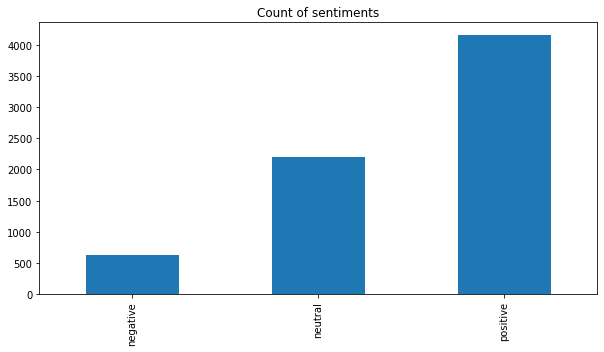

In [10]:
sentiments=df['overall_sentiment'].value_counts().sort_index().plot(kind='bar',title="Count of sentiments", figsize=(10,5))
sentiments


In [11]:
df['label_values'] = df['overall_sentiment']
df['label_values'] = df['label_values'].replace(['positive','negative','neutral'],[1,-1,0])

In [12]:
df.head(10)

,text_corrected,overall_sentiment,label_values
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,positive,1
1,The best of #10 YearChallenge! Completed in le...,positive,1
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1
3,10 Year Challenge - Sweet Dee Edition,positive,1
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0
5,"1998: ""Don't get in car with strangers"" 2008: ...",negative,-1
6,10 years challenge is lit af Üs & B erg 1945 1...,negative,-1
7,10 Year Challenge emotional edition boredpanda...,neutral,0
8,Fornite died in 10 months but Minecraft never ...,positive,1
9,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,positive,1


In [13]:
df['label_values'].value_counts()

 1    4156
 0    2200
-1     631
Name: label_values, dtype: int64

In [14]:
x = df
y = df['label_values']

In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(-1, 4156), (0, 4156), (1, 4156)] (12468,)


In [16]:
x_resampled

,text_corrected,overall_sentiment,label_values
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,positive,1
1,The best of #10 YearChallenge! Completed in le...,positive,1
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1
3,10 Year Challenge - Sweet Dee Edition,positive,1
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0
...,...,...,...
12463,Why are teh urflings looking at us?,neutral,0
12464,WHEN YOU ADD YOUR CRUSH AND SHE LIKES ALL YOUR...,neutral,0
12465,President Dr. Evil Trump a Deepfake,neutral,0
12466,...What Are You Saying? I Was Making Coffee an...,neutral,0


In [17]:
y_resampled.value_counts()

 1    4156
 0    4156
-1    4156
Name: label_values, dtype: int64

In [18]:
# posCounts, neutCounts, negCounts = df.label_values.value_counts()

# df_class_0 = df[df['label_values'] == 1]
# df_class_1  = df[df['label_values'] == 0]
# df_class_2  = df[df['label_values'] == -1]



In [19]:
# Oversample 1-class and concat the DataFrames of both classes

# df_sam1 = df_class_0.sample(negCounts,replace = True)
# df_sam2 = df_class_1.sample(negCounts,replace = True)

# df_test = pd.concat([df_sam1,df_sam2,df_class_2], axis = 0)


# print('Random over-sampling:')
# print(df_test.overall_sentiments.value_counts())

In [20]:
nltk.download('omw-1.4')
stemmer=PorterStemmer()
cleaned_text=[]
text_list=x_resampled['text_corrected']
text_list
for word in text_list:
  words=nltk.wordpunct_tokenize(str(word))
  words=unicodedata.normalize('NFKD', str(words)).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  words=re.sub('[^a-zA-Z0-9]'," ",str(words))
  words=re.sub(r'[^a-zA-Z]', ' ', words)
  words=re.sub(r"RT[\s]+"," ",str(words))
  words=re.sub(r"https?://\S+|www\.\S+","",str(words))
  words=re.sub(r'^\s*|\s\s*', ' ', str(words))

  words=words.lower()
  words=nltk.word_tokenize(str(words))
  words=[word for word in words if word not in set(stopwords.words('english'))]
  words=[stemmer.stem(word) for word in words]
  # words=[lemmatizer.lemmatize(word) for word in words]
  words=" ".join(words)
  # print(words)
  cleaned_text.append(words)
  # break
  

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
x_resampled

,text_corrected,overall_sentiment,label_values
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,positive,1
1,The best of #10 YearChallenge! Completed in le...,positive,1
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1
3,10 Year Challenge - Sweet Dee Edition,positive,1
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0
...,...,...,...
12463,Why are teh urflings looking at us?,neutral,0
12464,WHEN YOU ADD YOUR CRUSH AND SHE LIKES ALL YOUR...,neutral,0
12465,President Dr. Evil Trump a Deepfake,neutral,0
12466,...What Are You Saying? I Was Making Coffee an...,neutral,0


In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_text).toarray()
print(vectorizer.vocabulary_)
# X=X.toarray()
print(X.shape)



{'look': 5083, 'friend': 3184, 'lightyear': 4992, 'sohalikut': 7967, 'trend': 8854, 'play': 6577, 'year': 9704, 'challeng': 1384, 'facebook': 2830, 'imgflip': 4163, 'com': 1654, 'best': 823, 'yearchalleng': 9705, 'complet': 1695, 'less': 4937, 'kudu': 4777, 'narendramodi': 5822, 'ji': 4521, 'pm': 6598, 'jan': 4470, 'mumbai': 5755, 'india': 4228, 'sam': 7453, 'thorn': 8672, 'strippin': 8261, 'follow': 3077, 'saw': 7506, 'everyon': 2752, 'post': 6672, 'vs': 9304, 'pic': 6523, 'mine': 5558, 'retweet': 7214, 'like': 4995, 'sweet': 8387, 'dee': 2106, 'edit': 2554, 'filter': 2986, 'hilari': 3863, 'meme': 5396, 'get': 3380, 'car': 1273, 'stranger': 8243, 'meet': 5373, 'peopl': 6443, 'internet': 4335, 'alon': 231, 'memecent': 5404, 'uber': 8990, 'order': 6209, 'lit': 5024, 'af': 122, 'us': 9140, 'erg': 2694, 'wow': 9626, 'transform': 8831, 'emot': 2626, 'boredpanda': 1001, 'fornit': 3113, 'die': 2248, 'month': 5665, 'minecraft': 5559, 'never': 5904, 'proud': 6823, 'commun': 1686, 'ploy': 6594,

In [23]:
y = x_resampled['label_values'].values
y[500:690]

array([ 0,  0,  1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,
        1,  0, -1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,
        1,  1, -1, -1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  0,  0,  1,  1, -1,  1,  1,
        0,  1,  1,  1, -1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,
        1, -1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,
        1,  0,  1,  1,  1,  1,  0,  1,  1,  0, -1,  1,  0,  1,  1, -1,  1,
        0,  1,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1, -1,  1,  1,
        0,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0, -1,
        1,  0,  0])

In [24]:
df['label_values'].describe()

count    6987.000000
mean        0.504508
std         0.656249
min        -1.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label_values, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.metrics import f1_score


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print(X_train)


[[-0.0139165  -0.01001353  0.         ... -0.01001353 -0.02453418
  -0.01001353]
 [-0.0139165  -0.01001353  0.         ... -0.01001353 -0.02453418
  -0.01001353]
 [-0.0139165  -0.01001353  0.         ... -0.01001353 -0.02453418
  -0.01001353]
 ...
 [-0.0139165  -0.01001353  0.         ... -0.01001353 -0.02453418
  -0.01001353]
 [-0.0139165  -0.01001353  0.         ... -0.01001353 -0.02453418
  -0.01001353]
 [-0.0139165  -0.01001353  0.         ... -0.01001353 -0.02453418
  -0.01001353]]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier_1=KNeighborsClassifier(n_neighbors=5)
classifier_1.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier_2=GaussianNB()
classifier_2.fit(X_train,y_train)

GaussianNB()

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_3=LogisticRegression()
classifier_3.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred_1=classifier_1.predict(X_test)
y_pred_1

array([ 0, -1, -1, ..., -1, -1,  0])

In [44]:
y_pred_2=classifier_2.predict(X_test)
y_pred_2

array([ 0, -1,  1, ...,  1,  1,  1])

In [32]:
y_pred_3=classifier_3.predict(X_test)
y_pred_3

array([ 0, -1,  1, ..., -1,  0,  1])

In [33]:
print(accuracy_score(y_test,y_pred_1))


0.5721732157177225


In [45]:
print(accuracy_score(y_test,y_pred_2))

0.6082598235765838


In [35]:
print(accuracy_score(y_test,y_pred_3))


0.6912590216519647


In [36]:
print(f1_score(y_test, y_pred_1, average='macro'))

0.5132697622280445


In [46]:
print(f1_score(y_test, y_pred_2, average='macro'))

0.6131061316839356


In [38]:
print(f1_score(y_test, y_pred_3, average='macro'))

0.6901580276145891


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

          -1       0.53      0.99      0.70       806
           0       0.63      0.59      0.61       853
           1       0.63      0.14      0.23       835

    accuracy                           0.57      2494
   macro avg       0.60      0.58      0.51      2494
weighted avg       0.60      0.57      0.51      2494



In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_1)
print(cm)

[[800   5   1]
 [276 507  70]
 [420 295 120]]


In [41]:
import pickle 
pickle.dump(classifier, open("text_model.pkl", "wb"))

NameError: ignored